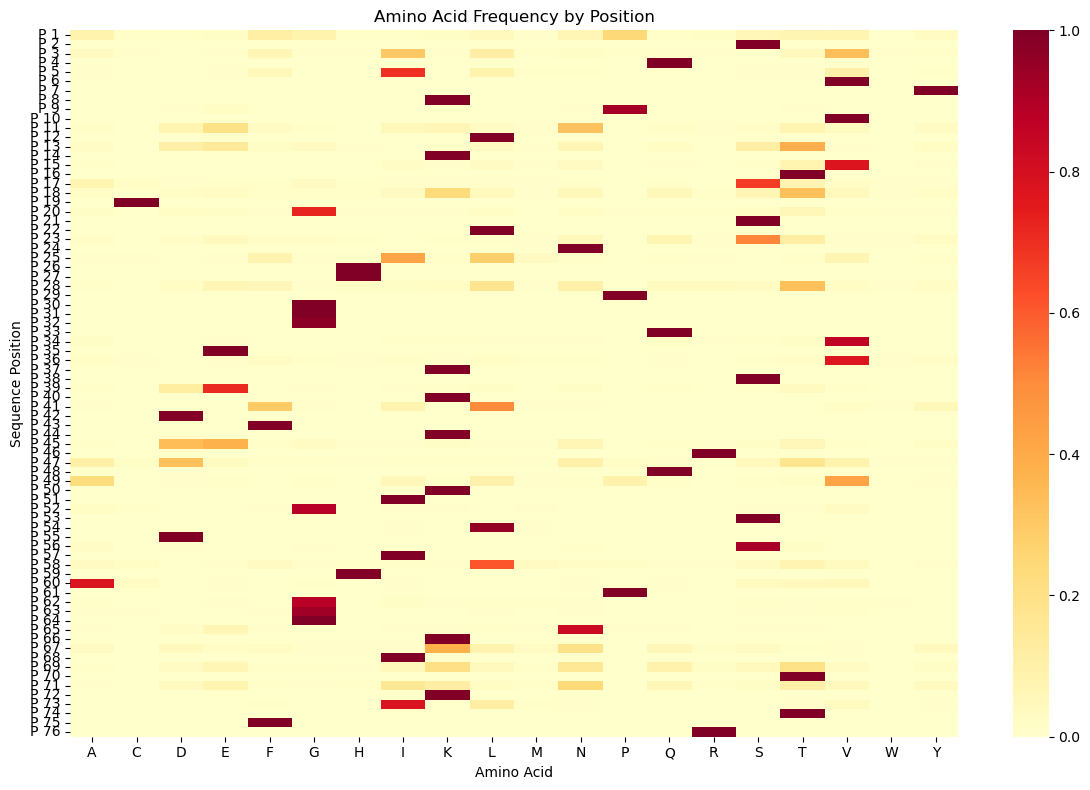

In [2]:
#find all the files csv files in a path and put them into a giant dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np

# Read the FASTA file
sequences = []
for record in SeqIO.parse("/work/CAND/shared/Chens/AD_fibrils/AD_redesign/7YMN_5_min/combined_fasta.fa", "fasta"):
    sequences.append(str(record.seq))
sequences
# Convert sequences to DataFrame where each row is a position and columns are amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
seq_length = len(sequences[0])
freq_matrix = np.zeros((seq_length, len(amino_acids)))

# Calculate frequencies
for pos in range(seq_length):
    pos_residues = [seq[pos] for seq in sequences]
    for aa_idx, aa in enumerate(amino_acids):
        freq_matrix[pos, aa_idx] = pos_residues.count(aa) / len(sequences)

# Create DataFrame
df = pd.DataFrame(freq_matrix, 
                 columns=list(amino_acids),
                 index=[f'P {i+1}' for i in range(seq_length)])

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap='YlOrRd', xticklabels=True, yticklabels=True)
plt.title('Amino Acid Frequency by Position')
plt.xlabel('Amino Acid')
plt.ylabel('Sequence Position')
plt.tight_layout()
plt.show()


In [6]:
from Bio.PDB import PDBParser
# You can use a dict to convert three letter code to one letter code
d3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}


# Just an example input pdb
record = '/work/CAND/shared/Chens/AD_fibrils/AD6_M66_14.pdb'

# run parser
parser = PDBParser(QUIET=True)
structure = parser.get_structure('struct', record)    

# iterate each model, chain, and residue
# printing out the sequence for each chain

for model in structure:
    for chain in model:
        seq = []
        for residue in chain:
            seq.append(d3to1[residue.resname])
        print('>some_header\n',''.join(seq))

>some_header
 IQIVFKPVYLIKLTSKSGSLGNIHFKPVGGQVEVKLEKLDLKDRVQLKLGSQDPILHVPLGEIKYIITLKLTL
>some_header
 IQIVFKPVYLIKLTSKSGSLGNIHFKPVGGQVEVKLEKLDLKDRVQLKLGSQDPILHVPLGEIKYIITLKLTL
>some_header
 IQIVFKPVYLIKLTSKSGSLGNIHFKPVGGQVEVKLEKLDLKDRVQLKLGSQDPILHVPLGEIKYIITLKLTL
>some_header
 IQIVFKPVYLIKLTSKSGSLGNIHFKPVGGQVEVKLEKLDLKDRVQLKLGSQDPILHVPLGEIKYIITLKLTL
>some_header
 IQIVFKPVYLIKLTSKSGSLGNIHFKPVGGQVEVKLEKLDLKDRVQLKLGSQDPILHVPLGEIKYIITLKLTL
>some_header
 IQIVFKPVYLIKLTSKSGSLGNIHFKPVGGQVEVKLEKLDLKDRVQLKLGSQDPILHVPLGEIKYIITLKLTL


In [ ]:
GSLQIVYKPVTLDKVTAGCGSLFNRHHVPGGGQKELKSTKFDFKNRVQTKIASLDSILHSPGGGDKRIQTHKITFR
IQIVFKPVYLIKLTSKSGSLGNIHFKPVGGQVEVKLEKLDLKDRVQLKLGSQDPILHVPLGEIKYIITLKLTL